In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

In [207]:
file_path = 'mntdata48_IndustryPortfolios.CSV.CSV'
data = pd.read_csv(file_path)

In [209]:
data = data.rename(columns={data.columns[0]: 'Date'})
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m', errors='coerce')
data = data.set_index('Date')

In [211]:
returns = data.apply(pd.to_numeric, errors='coerce') / 100

In [213]:
returns = returns[returns.index >= '1990-01-01']

In [215]:
def cornish_fisher_var(returns_series, confidence_level=0.05):
    mean_return = returns_series.mean()
    std_return = returns_series.std()
    skewness = skew(returns_series, nan_policy='omit')
    excess_kurtosis = kurtosis(returns_series, fisher=True, nan_policy='omit')

In [217]:
from scipy.stats import norm, skew, kurtosis

def cornish_fisher_var(returns_series, confidence_level=0.05):
    mean_return = returns_series.mean()
    std_return = returns_series.std()
    skewness = skew(returns_series, nan_policy='omit')
    excess_kurtosis = kurtosis(returns_series, fisher=True, nan_policy='omit')

    z = norm.ppf(confidence_level)
    modified_z = (z +
                  (1/6) * (z**2 - 1) * skewness +
                  (1/24) * (z**3 - 3*z) * excess_kurtosis -
                  (1/36) * (2*z**3 - 5*z) * (skewness**2))

    var_cf = -(mean_return + modified_z * std_return)
    return var_cf

var_95_cf = returns.apply(cornish_fisher_var)


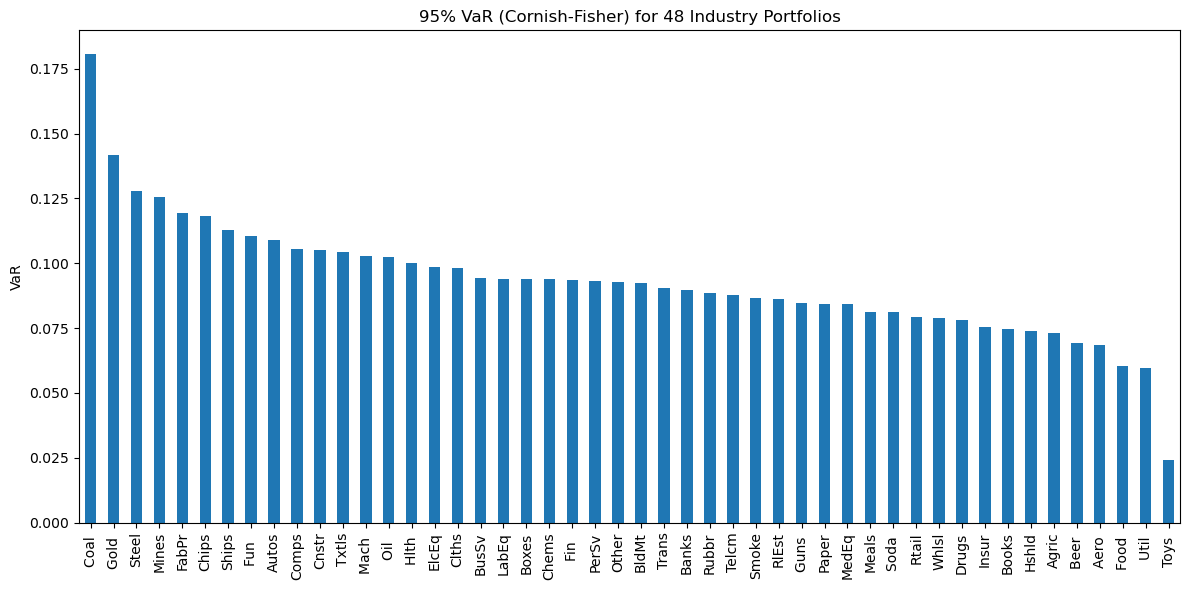

In [219]:
var_95_cf_sorted = var_95_cf.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
var_95_cf_sorted.plot(kind='bar')
plt.title('95% VaR (Cornish-Fisher) for 48 Industry Portfolios')
plt.ylabel('VaR')
plt.tight_layout()
plt.show()

In [221]:
annual_return = returns.mean() * 12
annual_volatility = returns.std() * np.sqrt(12)
risk_free_rate = 0.03

returns

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,-0.1155,-0.1022,-0.1062,-0.0902,-0.0865,-0.1145,-0.1073,-0.0934,-0.0774,-0.0939,...,-0.0489,-0.0821,-0.0754,-0.0559,-0.1205,-0.0971,-0.1057,-0.0868,-0.0828,-0.1030
1990-02-01,0.0938,-0.0096,-0.0091,0.0048,-0.0256,0.0059,0.0189,-0.0016,0.0014,0.0214,...,0.0446,0.0567,0.0221,0.0210,-0.0008,0.0388,0.0138,0.0089,0.0097,0.0243
1990-03-01,0.0281,0.0534,0.0989,0.0621,0.0681,0.0673,0.0111,-0.0066,0.0416,0.0753,...,0.0408,0.0292,0.0306,0.0607,-0.0031,-0.0301,0.0009,0.0240,-0.0217,0.0477
1990-04-01,-0.0209,-0.0003,-0.0475,0.0232,0.0477,-0.0596,0.0123,-0.0697,-0.0188,-0.0104,...,0.0143,-0.0392,-0.0216,-0.0167,-0.0530,-0.0429,-0.0448,-0.0423,-0.0337,0.0344
1990-05-01,0.0136,0.0920,0.0837,0.1590,0.0112,0.1236,0.1325,0.1036,0.0980,0.0782,...,0.0488,0.0458,0.0902,0.1189,0.1327,0.1055,0.1050,0.0045,0.0443,0.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,-0.0993,0.0287,0.0052,-0.0291,-0.0287,0.0075,-0.0256,-0.0355,-0.0253,-0.0294,...,-0.0066,-0.0300,0.0066,-0.0469,-0.0145,0.0023,0.0288,-0.0165,-0.0098,-0.0839
2024-09-01,-0.0776,-0.0287,0.0147,0.1153,-0.0689,0.0117,0.0128,0.0011,-0.0032,0.0675,...,0.0184,-0.0155,0.0170,0.0368,0.0321,-0.0035,0.0029,0.0525,0.0235,-0.0486
2024-10-01,-0.0650,0.0011,-0.0196,0.0205,-0.0719,-0.0546,0.0237,0.0874,-0.0791,-0.0464,...,-0.0419,-0.0038,-0.0567,-0.0721,0.0068,0.0156,0.0238,-0.0405,0.0458,-0.0264


In [223]:
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
sharpe_ratio_sorted = sharpe_ratio.sort_values(ascending=False)

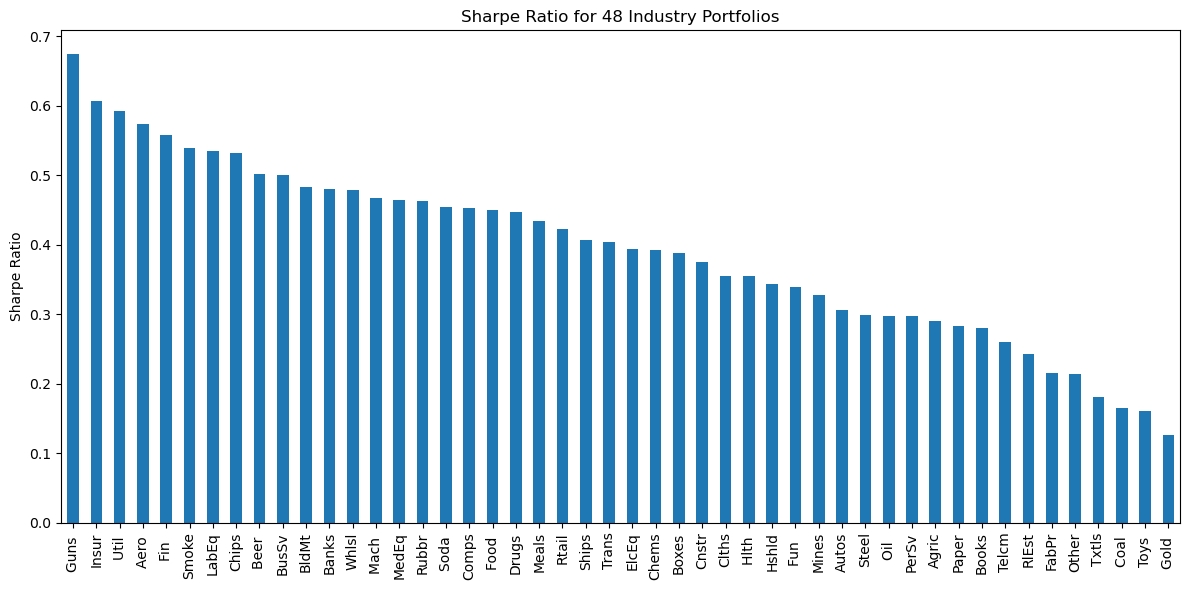

In [225]:
plt.figure(figsize=(12, 6))
sharpe_ratio_sorted.plot(kind='bar')
plt.title('Sharpe Ratio for 48 Industry Portfolios')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()
plt.show()

In [227]:
correlation = var_95_cf.corr(sharpe_ratio)
print(f"Correlation between VaR and Sharpe Ratio: {correlation}")

Correlation between VaR and Sharpe Ratio: -0.3339792558791171


In [229]:
def compute_cvar(returns_series, confidence_level=0.05):
    var_threshold = np.percentile(returns_series.dropna(), confidence_level * 100)
    cvar = -returns_series[returns_series <= var_threshold].mean()
    return cvar

In [231]:
cvar_95 = returns.apply(compute_cvar)

In [233]:
df_results = pd.DataFrame({
    'VaR_95_CF': var_95_cf,
    'Sharpe_Ratio': sharpe_ratio,
    'CVaR_95': cvar_95
})

print(df_results.sort_values(by='VaR_95_CF', ascending=False))

       VaR_95_CF  Sharpe_Ratio   CVaR_95
Coal    0.180763      0.164319  0.266283
Gold    0.141773      0.126128  0.214945
Steel   0.127681      0.298535  0.182586
Mines   0.125551      0.328118  0.168545
FabPr   0.119469      0.215338  0.177907
Chips   0.118089      0.531946  0.172993
Ships   0.112625      0.407492  0.168498
Fun     0.110511      0.339098  0.167940
Autos   0.108921      0.306506  0.176836
Comps   0.105505      0.453419  0.165176
Cnstr   0.104999      0.375634  0.156493
Txtls   0.104386      0.180240  0.179210
Mach    0.102667      0.467545  0.144624
Oil     0.102275      0.297880  0.180529
Hlth    0.100211      0.354385  0.140852
ElcEq   0.098520      0.393747  0.142790
Clths   0.097981      0.355712  0.142198
BusSv   0.094369      0.500114  0.144500
LabEq   0.093929      0.534786  0.134600
Boxes   0.093843      0.387397  0.132026
Chems   0.093759      0.391961  0.137452
Fin     0.093704      0.557938  0.133286
PerSv   0.092965      0.297456  0.131519
Other   0.092680

In [235]:
returns.kurtosis()

Agric     6.043676
Food      1.484369
Soda      5.323904
Beer      2.166759
Smoke     4.624596
Toys     25.993049
Fun       3.899534
Books     8.581821
Hshld     5.005868
Clths     2.790757
Hlth      0.918518
MedEq     2.402765
Drugs     7.119323
Chems     1.528231
Rubbr     2.555213
Txtls     6.805823
BldMt     2.890071
Cnstr     3.422621
Steel     1.377591
FabPr     2.650339
Mach      1.815169
ElcEq     2.485381
Autos     4.563110
Aero     12.472397
Ships     2.362390
Guns      2.388442
Gold      4.670969
Mines     1.415445
Coal      2.380947
Oil       8.202507
Util      0.858297
Telcm     5.887861
PerSv     1.992023
BusSv     3.192063
Comps     3.634838
Chips     2.064542
LabEq     1.658005
Paper     3.888695
Boxes     1.101197
Trans     1.239630
Whlsl     2.890408
Rtail     3.966795
Meals     6.523002
Banks     2.685894
Insur     3.053532
RlEst    11.006529
Fin       1.385172
Other     2.197421
dtype: float64

In [61]:
returns<0

,8.25,5.24,9.9,5.25,7.9,9.88,12.41,10.76,7.54,15.58,...,3.67,5.51,6.26,11.76,8.41,16.19,15.53,1.97,7.78,-3.08
Date,,,,,,,,,,,,,,,,,,,,,
1990-12-01,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1991-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1991-02-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1991-03-01,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1991-04-01,True,True,True,True,True,False,True,False,True,False,...,False,False,False,False,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,True,False,False,True,True,False,True,True,True,True,...,True,True,False,True,True,False,False,True,True,True
2024-09-01,True,True,False,False,True,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True
2024-10-01,True,False,True,False,True,True,False,False,True,True,...,True,True,True,True,False,False,False,True,False,True


In [63]:
returns.std()

8.25       0.068668
5.24       0.040533
9.9        0.070466
5.25       0.049523
7.9        0.073109
9.88       0.079516
12.41      0.076627
10.76      0.066454
7.54       0.054319
15.58      0.066278
8.23       0.065156
12.48      0.060587
9.24       0.073479
10.05      0.060992
10.54      0.062955
8.49       0.082840
7.01       0.064050
10.67      0.076159
2.93       0.084524
12.23      0.082113
10.04      0.067675
5.48       0.070735
2.93.1     0.087880
2.13       0.069238
9.53       0.078607
10.06      0.066311
-5.18      0.122282
5.72       0.083388
-4.43      0.127561
1.66       0.085589
2.29       0.038681
2.11       0.067445
6.55       0.062761
11.72      0.069335
12.23.1    0.080673
6.52       0.083301
9.13       0.066708
7.16       0.058191
3.67       0.060733
5.51       0.059918
6.26       0.055691
11.76      0.062910
8.41       0.057677
16.19      0.056924
15.53      0.049171
1.97       0.071946
7.78       0.062092
-3.08      0.059134
dtype: float64

In [65]:
(((returns-returns.mean())**4).mean())/((returns.std(ddof=0))**4)

8.25        9.136344
5.24        4.505438
9.9         8.400119
5.25        5.201332
7.9         7.597933
9.88       29.349600
12.41       6.959529
10.76      11.688927
7.54        8.079138
15.58       5.894170
8.23        3.930113
12.48       5.439032
9.24       10.095006
10.05       4.549119
10.54       5.621336
8.49        9.876973
7.01        5.940448
10.67       6.458794
2.93        4.379260
12.23       5.665652
10.04       4.854246
5.48        5.484781
2.93.1      7.533963
2.13       15.595350
9.53        5.407126
10.06       5.389242
-5.18       7.632694
5.72        4.401569
-4.43       5.335642
1.66       11.062082
2.29        3.882580
2.11        8.913224
6.55        5.044389
11.72       6.241541
12.23.1     6.638877
6.52        5.071680
9.13        4.692148
7.16        6.915000
3.67        4.092298
5.51        4.256676
6.26        5.930251
11.76       7.052546
8.41        9.826680
16.19       5.873410
15.53       6.217636
1.97       14.142402
7.78        4.436038
-3.08       5

In [67]:
returns.columns = returns.columns.str.strip()
returns.columns

Index(['8.25', '5.24', '9.9', '5.25', '7.9', '9.88', '12.41', '10.76', '7.54',
       '15.58', '8.23', '12.48', '9.24', '10.05', '10.54', '8.49', '7.01',
       '10.67', '2.93', '12.23', '10.04', '5.48', '2.93.1', '2.13', '9.53',
       '10.06', '-5.18', '5.72', '-4.43', '1.66', '2.29', '2.11', '6.55',
       '11.72', '12.23.1', '6.52', '9.13', '7.16', '3.67', '5.51', '6.26',
       '11.76', '8.41', '16.19', '15.53', '1.97', '7.78', '-3.08'],
      dtype='object')

In [69]:
returns.head(4)

,8.25,5.24,9.9,5.25,7.9,9.88,12.41,10.76,7.54,15.58,...,3.67,5.51,6.26,11.76,8.41,16.19,15.53,1.97,7.78,-3.08
Date,,,,,,,,,,,,,,,,,,,,,
1990-12-01,-0.0216,0.0487,0.0258,0.0236,0.0536,0.0212,0.0291,0.0569,0.0333,0.0792,...,0.0624,0.0523,0.0489,0.0286,0.0498,0.0751,0.0512,0.0111,0.0221,0.0707
1991-01-01,0.0686,0.0307,0.0562,0.0465,0.0268,0.1185,0.0496,0.0938,0.0078,0.1831,...,0.1220,0.1246,0.0312,0.1170,0.0110,0.0834,0.0627,0.0570,0.0732,0.1249
1991-02-01,0.1048,0.1205,0.0743,0.1086,0.0768,0.1765,0.1015,0.0318,0.0626,0.1576,...,0.0552,0.0548,0.0858,0.0770,0.1571,0.1238,0.0921,0.0745,0.1155,0.0681
1991-03-01,0.0242,0.0614,0.0588,0.0568,0.0137,0.0438,-0.0230,0.0051,0.0415,0.0462,...,0.0848,-0.0195,0.0324,0.0939,0.0972,0.0478,0.0520,0.1095,0.0960,-0.0380


### Now calculating the Value at Risk using the Modified Cornish-Fisher Approach 


In [71]:
import numpy as np
import scipy.stats as scs
np.percentile(returns, 5, axis=0)*-1

array([0.09482, 0.05684, 0.09598, 0.0719 , 0.10208, 0.1061 , 0.11112,
       0.09608, 0.0774 , 0.09648, 0.09528, 0.08446, 0.09534, 0.09382,
       0.0971 , 0.11884, 0.09402, 0.10636, 0.12246, 0.11528, 0.09746,
       0.10746, 0.11962, 0.09012, 0.10692, 0.08496, 0.16478, 0.1109 ,
       0.18792, 0.11898, 0.05648, 0.10244, 0.09118, 0.09728, 0.11462,
       0.119  , 0.0964 , 0.08876, 0.09094, 0.08986, 0.07848, 0.08462,
       0.07686, 0.07996, 0.06298, 0.10272, 0.09178, 0.08298])

In [73]:
z=norm.ppf(0.05)
z

-1.6448536269514729

In [75]:
var_norm=-1*(returns.mean()+z*returns.std())
var_norm

8.25       0.104371
5.24       0.058860
9.9        0.103959
5.25       0.071832
7.9        0.106561
9.88       0.124215
12.41      0.115744
10.76      0.101033
7.54       0.081331
15.58      0.099285
8.23       0.097866
12.48      0.089047
9.24       0.108915
10.05      0.090670
10.54      0.092332
8.49       0.128822
7.01       0.093565
10.67      0.114309
2.93       0.128893
12.23      0.127382
10.04      0.099292
5.48       0.105574
2.93.1     0.133898
2.13       0.099634
9.53       0.116968
10.06      0.093447
-5.18      0.193740
5.72       0.126511
-4.43      0.200996
1.66       0.130850
2.29       0.054359
2.11       0.103075
6.55       0.095086
11.72      0.101347
12.23.1    0.119496
6.52       0.121363
9.13       0.096626
7.16       0.088235
3.67       0.090444
5.51       0.088685
6.26       0.081130
11.76      0.093118
8.41       0.084576
16.19      0.082627
15.53      0.069313
1.97       0.110046
7.78       0.089014
-3.08      0.090839
dtype: float64

In [77]:
n_months = returns["1990":].shape[0]
n_months

829

In [79]:
n_months=returns.shape[0]
n_years=n_months/12
n_years

69.08333333333333

In [81]:
z=norm.ppf(0.05)
s=scs.skew(returns[-408:]) #for the last 34 years (408 months)
k=scs.kurtosis(returns[-408:])
z_cf=(z
      + (z**2 - 1)*s/6
      + (z**3 -3*z)*(k-3)/24 
      - (2*z**3 - 5*z)*(s**2)/36)
z_cf

array([-1.04139679, -1.77700533, -1.22750097, -1.58060482, -1.29446077,
        0.14614412, -1.53059936, -1.17873317, -1.5342754 , -1.61622146,
       -1.70953481, -1.55574129, -1.36395029, -1.76822122, -1.61317008,
       -1.37100035, -1.66719056, -1.44390797, -1.66829251, -1.58388118,
       -1.70691186, -1.50872916, -1.49545025, -0.88976922, -1.59146534,
       -1.46152281, -1.30958748, -1.65039244, -1.45190482, -1.39494198,
       -1.81681892, -1.45260593, -1.57897936, -1.53800833, -1.3859322 ,
       -1.56017203, -1.5986501 , -1.62434497, -1.74007186, -1.69238515,
       -1.60311991, -1.41600314, -1.56867874, -1.74692328, -1.80446645,
       -1.61169071, -1.70899667, -1.660632  ])

In [83]:
var_cf=-1*(returns[-408:].mean()+z_cf*returns[-408:].std())
var_cf

8.25       0.070766
5.24       0.063524
9.9        0.078077
5.25       0.073418
7.9        0.086506
9.88      -0.020879
12.41      0.107641
10.76      0.077478
7.54       0.089905
15.58      0.099829
8.23       0.102248
12.48      0.097888
9.24       0.113626
10.05      0.103411
10.54      0.095497
8.49       0.102880
7.01       0.092332
10.67      0.104745
2.93       0.124102
12.23      0.116373
10.04      0.104542
5.48       0.102710
2.93.1     0.115783
2.13       0.049319
9.53       0.119669
10.06      0.086324
-5.18      0.167274
5.72       0.133680
-4.43      0.184260
1.66       0.132608
2.29       0.056231
2.11       0.107222
6.55       0.094988
11.72      0.103885
12.23.1    0.104105
6.52       0.120728
9.13       0.098618
7.16       0.096433
3.67       0.099287
5.51       0.097730
6.26       0.086617
11.76      0.093281
8.41       0.091810
16.19      0.076211
15.53      0.070785
1.97       0.101468
7.78       0.081602
-3.08      0.091149
dtype: float64

<Axes: >

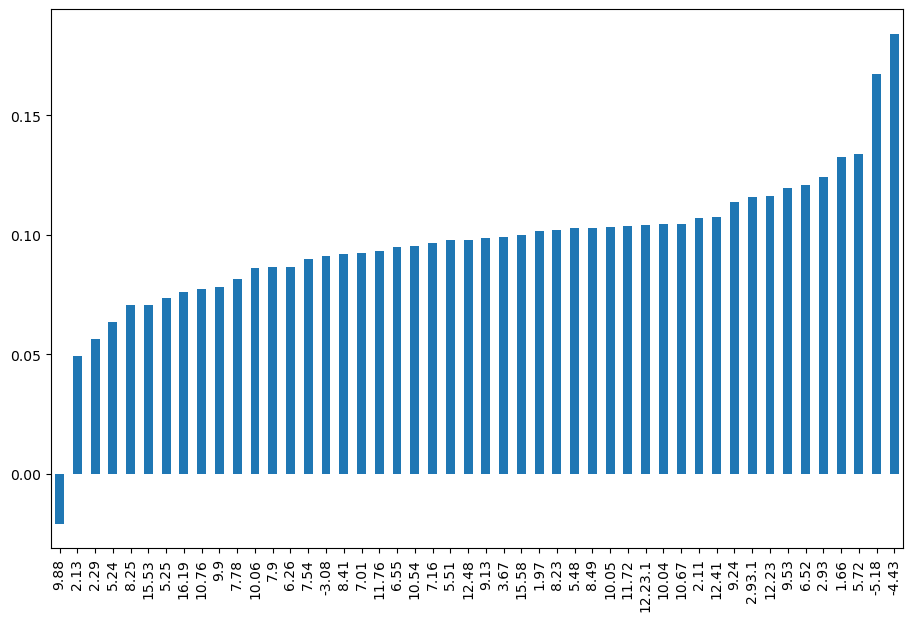

In [85]:
var_cf.sort_values().plot.bar(figsize=(11,7))

In [89]:
n_months=returns.shape[0]
n_years=n_months/12
n_years

69.08333333333333

In [93]:
annual_vol=returns.std()*np.sqrt(12)
annual_vol

8.25       0.237872
5.24       0.140409
9.9        0.244103
5.25       0.171554
7.9        0.253258
9.88       0.275452
12.41      0.265445
10.76      0.230204
7.54       0.188166
15.58      0.229595
8.23       0.225707
12.48      0.209881
9.24       0.254537
10.05      0.211282
10.54      0.218081
8.49       0.286965
7.01       0.221874
10.67      0.263822
2.93       0.292800
12.23      0.284446
10.04      0.234433
5.48       0.245034
2.93.1     0.304426
2.13       0.239848
9.53       0.272301
10.06      0.229707
-5.18      0.423596
5.72       0.288863
-4.43      0.441883
1.66       0.296488
2.29       0.133995
2.11       0.233635
6.55       0.217409
11.72      0.240182
12.23.1    0.279458
6.52       0.288564
9.13       0.231084
7.16       0.201579
3.67       0.210386
5.51       0.207563
6.26       0.192920
11.76      0.217928
8.41       0.199798
16.19      0.197189
15.53      0.170332
1.97       0.249230
7.78       0.215093
-3.08      0.204847
dtype: float64

In [96]:
returns.shape

(829, 48)

In [100]:
cov = returns[returns.index >= "2002"].cov() * 12

cov.shape

(48, 48)

In [103]:
annual_return=(1+returns).prod()**(1/n_years)-1
annual_return

8.25       0.078618
5.24       0.087162
9.9        0.120737
5.25       0.105710
7.9        0.141560
9.88       0.044693
12.41      0.091669
10.76      0.075908
7.54       0.081448
15.58      0.094183
8.23       0.089587
12.48      0.110719
9.24       0.118118
10.05      0.097438
10.54      0.116820
8.49       0.049671
7.01       0.123210
10.67      0.101364
2.93       0.081437
12.23      0.053005
10.04      0.122961
5.48       0.104226
2.93.1     0.085859
2.13       0.152511
9.53       0.116851
10.06      0.174122
-5.18      0.004113
5.72       0.089272
-4.43      0.008848
1.66       0.078239
2.29       0.107078
2.11       0.069431
6.55       0.076722
11.72      0.131015
12.23.1    0.126732
6.52       0.156493
9.13       0.138814
7.16       0.071651
3.67       0.095048
5.51       0.101289
6.26       0.112535
11.76      0.105888
8.41       0.108360
16.19      0.118202
15.53      0.131388
1.97       0.070663
7.78       0.142687
-3.08      0.057406
dtype: float64

In [106]:
annual_return/annual_vol

8.25       0.330503
5.24       0.620770
9.9        0.494614
5.25       0.616191
7.9        0.558954
9.88       0.162254
12.41      0.345340
10.76      0.329744
7.54       0.432853
15.58      0.410211
8.23       0.396915
12.48      0.527535
9.24       0.464052
10.05      0.461174
10.54      0.535672
8.49       0.173090
7.01       0.555314
10.67      0.384214
2.93       0.278133
12.23      0.186346
10.04      0.524503
5.48       0.425355
2.93.1     0.282036
2.13       0.635864
9.53       0.429126
10.06      0.758019
-5.18      0.009710
5.72       0.309046
-4.43      0.020023
1.66       0.263887
2.29       0.799123
2.11       0.297178
6.55       0.352893
11.72      0.545484
12.23.1    0.453493
6.52       0.542315
9.13       0.600710
7.16       0.355450
3.67       0.451778
5.51       0.487992
6.26       0.583321
11.76      0.485884
8.41       0.542351
16.19      0.599436
15.53      0.771367
1.97       0.283527
7.78       0.663370
-3.08      0.280237
dtype: float64

Sharpe Ratio
Annual Risk free rate is given to be 3%

In [110]:
rf=0.03
sharpe_ratio=(annual_return-rf)/annual_vol
sharpe_ratio

8.25       0.204385
5.24       0.407108
9.9        0.371715
5.25       0.441320
7.9        0.440498
9.88       0.053342
12.41      0.232322
10.76      0.199424
7.54       0.273419
15.58      0.279546
8.23       0.264000
12.48      0.384596
9.24       0.346191
10.05      0.319183
10.54      0.398109
8.49       0.068548
7.01       0.420102
10.67      0.270501
2.93       0.175674
12.23      0.080878
10.04      0.396535
5.48       0.302923
2.93.1     0.183490
2.13       0.510785
9.53       0.318953
10.06      0.627418
-5.18     -0.061112
5.72       0.205190
-4.43     -0.047868
1.66       0.162703
2.29       0.575233
2.11       0.168773
6.55       0.214904
11.72      0.420579
12.23.1    0.346142
6.52       0.438352
9.13       0.470887
7.16       0.206625
3.67       0.309183
5.51       0.343458
6.26       0.427816
11.76      0.348224
8.41       0.392199
16.19      0.447298
15.53      0.595241
1.97       0.163156
7.78       0.523896
-3.08      0.133786
dtype: float64

<Axes: >

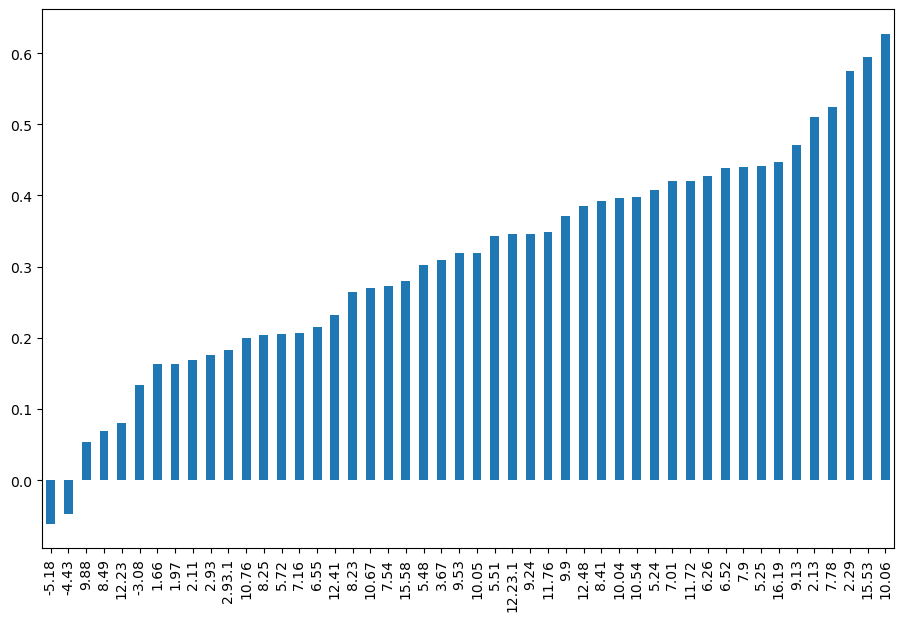

In [113]:
sharpe_ratio.sort_values().plot.bar(figsize=(11,7))

Do you observe a relation between the results of parts (a) and (b)?
(HINT: For example, you can investigate whether industries with the highest values in part (a) also have the highest values in part (b), or other relations like this)

There is a negative relationship beween the 95th VaR values and the sharpe ratio's adjuated risk returns of industries. At 95th VaR Gold, Fabric and Coal had the highest values but using the Sharpe ratio, Gold has the lowest value and also Coal and Fabric in the lowest six.

Across industries, a negative correlation is evident between the 95th percentile VaR values and Sharpe ratio values. Notably, the Textile sector displays the third lowest Sharpe ratio, contrasting with the Coal industry, which boasts the highest 95th percentile VaR. This observation underscores the trade-off between downside risk and risk-adjusted returns, highlighting the need for investors to carefully assess sector-specific dynamics when optimizing portfolio allocations for optimal risk-return profiles.

d. Use the VaR estimates from part (a) and compute the CVaR (i.e., Beyond VaR) for all portfolios. (Note: you need to build your own code for this part)

In [144]:
import pandas as pd
import scipy.stats


portfolio_losses = pd.Series(scipy.stats.norm.rvs(size=1000))


VaR_cf = scipy.stats.norm.ppf(0.95)


CVaR_cf = (1 / (1 - 0.95)) * scipy.stats.norm.expect(lambda x: x, lb=VaR_cf)

print("CVaR_cf = ", CVaR_cf)


CVaR_cf =  2.062712807818914


Question 8 The Case of Two Assets Efficient Frontier
Pick your favorite two industries and plot the two-asset efficient frontier using annual returns and volatilities. To do so, create portfolios of the two assets with weights in the increments of 0.10, for example (0, 1), (0.1, 0.9), (0.2, 0.8), … .



In [150]:
print(cov.index)
print(cov.columns)




Index(['8.25', '5.24', '9.9', '5.25', '7.9', '9.88', '12.41', '10.76', '7.54',
       '15.58', '8.23', '12.48', '9.24', '10.05', '10.54', '8.49', '7.01',
       '10.67', '2.93', '12.23', '10.04', '5.48', '2.93.1', '2.13', '9.53',
       '10.06', '-5.18', '5.72', '-4.43', '1.66', '2.29', '2.11', '6.55',
       '11.72', '12.23.1', '6.52', '9.13', '7.16', '3.67', '5.51', '6.26',
       '11.76', '8.41', '16.19', '15.53', '1.97', '7.78', '-3.08'],
      dtype='object')
Index(['8.25', '5.24', '9.9', '5.25', '7.9', '9.88', '12.41', '10.76', '7.54',
       '15.58', '8.23', '12.48', '9.24', '10.05', '10.54', '8.49', '7.01',
       '10.67', '2.93', '12.23', '10.04', '5.48', '2.93.1', '2.13', '9.53',
       '10.06', '-5.18', '5.72', '-4.43', '1.66', '2.29', '2.11', '6.55',
       '11.72', '12.23.1', '6.52', '9.13', '7.16', '3.67', '5.51', '6.26',
       '11.76', '8.41', '16.19', '15.53', '1.97', '7.78', '-3.08'],
      dtype='object')


In [124]:
weights = np.array([.20, .80])
weights

array([0.2, 0.8])

In [127]:
n_points = 11
weights = [np.array([weights, 1-weights]) for weights in np.linspace(0,1,n_points) ]
weights

[array([0., 1.]),
 array([0.1, 0.9]),
 array([0.2, 0.8]),
 array([0.3, 0.7]),
 array([0.4, 0.6]),
 array([0.5, 0.5]),
 array([0.6, 0.4]),
 array([0.7, 0.3]),
 array([0.8, 0.2]),
 array([0.9, 0.1]),
 array([1., 0.])]

In [162]:
import numpy as np
import pandas as pd

def portfolio_return(weights, returns):
    return np.dot(weights, returns)


def portfolio_vol(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))



In [174]:

annual_return = pd.Series({"Food": 0.08, "Meals": 0.12})


cov = pd.DataFrame({
    "Food": [0.04, 0.02],
    "Meals": [0.02, 0.09]
}, index=["Food", "Meals"])


In [176]:

weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, 10)]


In [178]:

l = ["Food", "Meals"]


returns = [portfolio_return(weights, annual_return[l]) for weights in weights]
vols = [portfolio_vol(weights, cov.loc[l, l]) for weights in weights]


In [192]:

ef = pd.DataFrame({"Returns": returns, "Risk": vols})


print(ef.head())


    Returns      Risk
0  0.120000  0.300000
1  0.115556  0.274874
2  0.111111  0.251661
3  0.106667  0.230940
4  0.102222  0.213437


In [194]:
def minimize_cvar(sim_corr_returns, er, target_return, alpha=0.05):
    """
    Returns the optimal weights (n x 1) that achieve the target return
    and minimize cvar, based on a set of simulated correlated returns (n x S)
    and an array of expected returns (er)=(n x 1)
    """
    n = er.shape[0] 
    S = sim_corr_rets.shape[1] 
    
    init_guess = np.repeat(1/n, n)
    
    bounds = ((0.0, 1.0),) * n 
    
    def cvar(var, var_dev, S, alpha):
        return var+np.sum(var_dev)/(S*(1-alpha))

In [196]:


def portfolio_return(weights, returns):
    return np.dot(weights, returns)

def portfolio_vol(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))


annual_ret = pd.Series({"Food": 0.08, "Meals": 0.12})
cov = pd.DataFrame({
    "Food": [0.04, 0.02],
    "Meals": [0.02, 0.09]
}, index=["Food", "Meals"])


l = ["Food", "Meals"]
w = np.array([0.5, 0.5]) 


port_return = portfolio_return(w, annual_ret[l])
port_vol = portfolio_vol(w, cov.loc[l, l])

print(f"Portfolio Return: {port_return}")
print(f"Portfolio Volatility: {port_vol}")



Portfolio Return: 0.1
Portfolio Volatility: 0.206155281280883


<Axes: xlabel='Risk'>

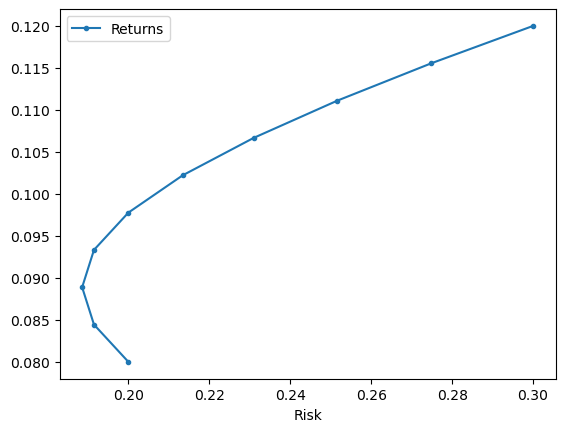

In [199]:
ef.plot.line(x="Risk", y="Returns", style=".-")